In [2]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

import pandas as pd  # data frame operations
import numpy as np #arrays and math functions
import statsmodels.api as sm #stat models (regression)
import matplotlib.pyplot as plt #2d plotting
from pandas.tools.plotting import scatter_matrix  # scatter plot matrix
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
from sklearn.tree import DecisionTreeRegressor  # machine learning tree
from sklearn.ensemble import RandomForestRegressor # ensemble method
from sklearn.preprocessing import Imputer
%config IPCompleter.greedy=True #tabbing for autocomplete
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from math import sqrt
from pandas import DataFrame
from scipy.stats import boxcox
import warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
!pip install cufflinks
import cufflinks as cf
import plotly 
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
init_notebook_mode(connected=True)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


You have read in a  <class 'pandas.core.frame.DataFrame'>
This dataframe currently have  15338  rows  and 268 columns
This dataframe currently has  10638  rows  and 268 columns
4700  observations lost by removing all missing values - Circle back if this impacts accuracy. Note that null values decrease substantially post 2003.


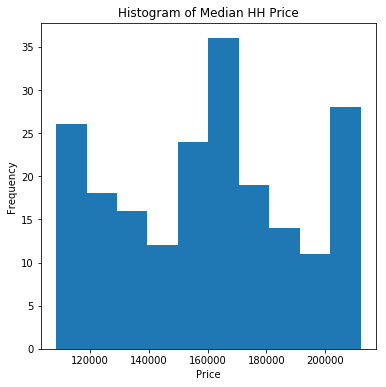

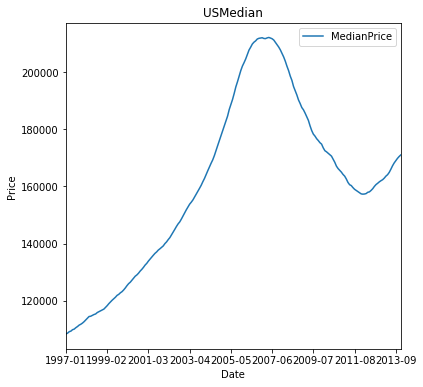

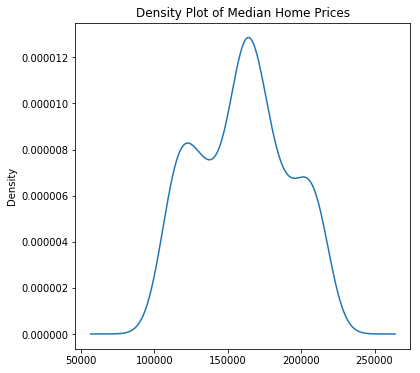

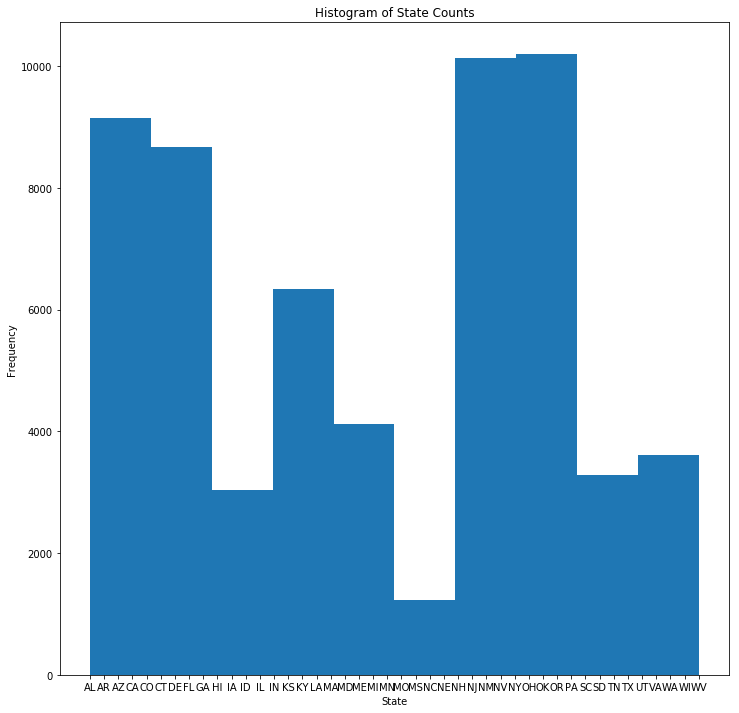

state     object
Price    float64
dtype: object

In [3]:

#Read CSV File in from the web
## files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv

url = 'http://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv'
data = pd.read_csv(url) #pandas read csv function
print(str("You have read in a"),'' ,type(data))  #Printing object type

print(str("This dataframe currently have"), '', np.shape(data)[0], '', str("rows"), '', str("and"), 
      np.shape(data)[1], str("columns")) #printing dimensions of current dataframe

    #Change RegionID to Zipcode to avoid confusion
data.rename(columns={'RegionID' : 'Zipcode', 'RegionName' : 'Region',
                     'CountyName' : 'County'}, inplace=True)

data.head(n=2) #calling first 2 rows



df_cleaned = data.dropna()
warnings.filterwarnings("ignore")
df_cleaned["Zipcode"] = df_cleaned["Zipcode"].astype('category')
df_cleaned["Region"] = df_cleaned["Region"].astype('category')
df_cleaned["City"] = df_cleaned["City"].astype('category')
df_cleaned["State"] = df_cleaned["State"].astype('category')
df_cleaned["Metro"] = df_cleaned["Metro"].astype('category')
df_cleaned["County"] = df_cleaned["County"].astype('category')
df_cleaned["SizeRank"] = df_cleaned["SizeRank"].astype('category')

print(str("This dataframe currently has"), '', np.shape(df_cleaned)[0], '', str("rows"), '', str("and"), 
      np.shape(df_cleaned)[1], str("columns")) 
#printing dimensions of cleaned dataframe.


allminusmissing = (np.shape(data)[0])-(np.shape(df_cleaned)[0])
print(allminusmissing,'', 
          str("observations lost by removing all missing values - Circle back if this impacts accuracy. Note that null values decrease substantially post 2003."))

df_cleaned.describe() #print summary stats of all columns

    
    




# We can clean data to reduce size/shape 

#Only looking at 4 cities
filter_list = ['Hot Springs', 'Little Rock', 'Fayetteville', 'Searcy']
#df_cleaned[df_cleaned.City.isin(filter_list)]  
                                                    #http://www.ritchieng.com/pandas-multi-criteria-filtering/
df_ark = pd.DataFrame(df_cleaned[df_cleaned.City.isin(filter_list)])
df_ark1 = df_ark.loc[:, 'Metro']


#need to shave columns < 1997
#df_ark.columns.get_loc('1997-01') #find index of 1997
df_ark2 =  df_ark.loc[:, '1997-01' : '2013-12'] #use .loc to index labels 
                                                    #https://stackoverflow.com/questions/10665889/how-to-take-column-slices-of-dataframe-in-pandas

#Merge two sets of columns together on index/zip
#pd.concat([df_ark1, df_ark2], axis=1, join='outer')
df_ark = pd.concat([df_ark1, df_ark2], axis=1, join='outer') #https://pandas.pydata.org/pandas-docs/stable/merging.html

np.shape(df_ark)# 26 observations w/ data from 1997 - Latest



#Grouping By + Mean
df_ark = df_ark.groupby(['Metro']).mean()
df_ark #There is a Fayetteville in Atlanta, Remove
df_ark = df_ark.drop('Atlanta', 0) #(0 for rows and 1 for columns.)

#separate dfs and out in 'tab
fay = pd.melt((df_ark.filter(like = 'Fayette', axis=0)))
hotspr = pd.melt((df_ark.filter(like = 'Hot', axis=0)))
littlerock = pd.melt((df_ark.filter(like = 'Little Rock', axis=0)))
searcy = pd.melt((df_ark.filter(like = 'Searcy', axis=0)))

fay['variable'] = pd.to_datetime(fay['variable'])
hotspr['variable'] = pd.to_datetime(hotspr['variable'])
littlerock['variable'] = pd.to_datetime(littlerock['variable'])
searcy['variable'] = pd.to_datetime(searcy['variable'])

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from pylab import rcParams
rcParams['figure.figsize'] = 6,6


#Create melted dataframe taking median house price per t
df = df_cleaned.loc[:, '1997-01' : '2013-12'] 

dfmedian = pd.DataFrame(df.median(), columns= ['MedianPrice'])
dfmedian['MedianPrice'] = round(dfmedian['MedianPrice'], 2)

plt.hist(dfmedian.MedianPrice, bins = 10)
plt.title('Histogram of Median HH Price')
plt.xlabel('Price')
plt.ylabel('Frequency')


#Plot US Median House price per t
dfmedian.plot(y = 'MedianPrice')
plt.title('USMedian')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


dfmedian.MedianPrice.plot(kind = 'kde')
plt.title('Density Plot of Median Home Prices')
plt.show()
dfmediantest = df_cleaned.loc[:, '2014-01' : '2014-12']
dfmediantest = pd.DataFrame(dfmediantest.median(), columns= ['MedianPrice'])
dfmediantest['MedianPrice'] = round(dfmediantest['MedianPrice'], 2)
dfmediantest = dfmediantest.astype('float32')






import datetime
rcParams['figure.figsize'] = 6,6

dftest = df_cleaned
dftest.head()

dfstatemedian = round(dftest.groupby(['State', 'Zipcode']).median() ,2)
dfstatemedian = dfstatemedian.reset_index(level = 'State')
dfstatemedian = dfstatemedian.reset_index(level = 'Zipcode')
dfstatemedian = dfstatemedian.dropna(how='any')

#Melted DF for plotting/vis. Grouped by state by average HH price
dfstatemedian1 = pd.melt(dfstatemedian, id_vars=['State', 'Zipcode'])
dfstatemedian1.rename(columns = {'variable' : 'Date', 'value': 'Price'}, inplace=True)

dfstatemedian1.head()


#df 
dfstatemedian1.head(10)

#Tax data from IRS
tax = pd.read_csv('Tax2016.csv')
CensusEst = pd.read_csv('Census2015.csv') #https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=BP_2015_00CZ1&prodType=table
external = pd.merge(tax, CensusEst, on= 'Zipcode', how= 'inner')
external.head()

dfstatemedian2 = pd.merge(dfstatemedian1, external, on= 'Zipcode', how= 'inner')

dfstatemedian2 = dfstatemedian2.groupby(['Zipcode', 'Date', 'State']).mean()
dfstatemedian2 = dfstatemedian2.reset_index()
dfstatemedian2

#Break out datetime into month/year
dfstatemedian2['Date'] = pd.to_datetime(dfstatemedian2['Date'])
dfstatemedian2['Date'] = pd.to_datetime(dfstatemedian2['Date'])
dfstatemedian2['year'], dfstatemedian2['month'] = dfstatemedian2['Date'].dt.year, dfstatemedian2['Date'].dt.month

train = dfstatemedian2
train = train.groupby(['year', 'Zipcode', 'State']).mean()
train = train.reset_index()
train
train["Zipcode"] = train["Zipcode"].astype('category')
train["State"] = train["State"].astype('category')
train.head()
train.drop('month', 1, inplace= True)


rcParams['figure.figsize'] = 12,12


plt.hist(train.State)
plt.title('Histogram of State Counts')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()



#Create dataframe to render map
train.head()

df123 = train.groupby(['State']).mean()
df123 = pd.DataFrame(df123.iloc[:, :2])
df123.drop('year', 1, inplace= True)
df123.head()
df123 = df123.reset_index()
df123 = df123.rename(columns={'State':'state'})

df123.head()
df123['state'] = df123['state'].apply(str)
df123.head()
df123.dtypes
df123['state'] = df123['state'].astype('str')
df123.dtypes



In [4]:
# Code was borrowed from the below link, and supplied w/ the help of Amara Moosa
#https://www.kaggle.com/abigaillarion/police-fatalities-in-united-states


# Create a subset data frame of the dataset
data = df123[['state', 'Price']]

# Median home price per 100,000 people in state
median_price = np.round(df123.Price, 2)

# Create a collor scale for the visualization
color_scale = [[0, 'rgb(229, 239, 245)'], [1, 'rgb(1, 97, 156)']]

# Define the dataset
data = [dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = color_scale,
        showscale = False,
        locations = df123.state,
        locationmode = 'USA-states',
        z = median_price,
        marker = dict(
            line = dict(
                color = 'rgb(255, 255, 255)',
                width = 2)
            ),
        )]

# Define the layout of the map
layout = dict(
         title = 'Median home price (1997-2013)',
         geo = dict(
             scope = 'usa',
             projection = dict(type = 'albers usa'),
             countrycolor = 'rgb(255, 255, 255)',
             showlakes = True,
             lakecolor = 'rgb(255, 255, 255)')
         )

# Display the final map
figure = dict(data = data, layout = layout)
init_notebook_mode(connected= True)


iplot(figure)

